In [1]:
# get all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter
import warnings
import math as ma
warnings.filterwarnings("ignore")

## REDING EXCEL FILE

In [2]:
#kpmge=pd.ExcelFile('KPMG_VI_New_raw_data_update_final (3).xlsx')#i don't know why this line will be wrrritten
                                                                #without this its also work
df = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="NewCustomerList")
# path = "KPMG_VI_New_raw_data_update_final (3).xlsx" 
# df = pd.io.excel.read_excel(path,sheet_name="Transactions")
list(df)

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Rank',
 'Value',
 'Customer Age ']

In [3]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Customer Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.84,1.0500,1.3125,1.115625,1,1,1.718750,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.57,0.5700,0.7125,0.605625,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.63,0.6300,0.6300,0.630000,1,1,1.718750,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.75,0.9375,0.9375,0.937500,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.41,0.4100,0.5125,0.512500,4,4,1.703125,55.0


In [4]:
df.rename(columns={'Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ':'first_name'}, inplace = True)
df.rename(columns={
 'Unnamed: 1':'last_name',
 'Unnamed: 2':'gender',
 'Unnamed: 3':'past_3_years_bike_related_purchases',
 'Unnamed: 4':'DOB',
 'Unnamed: 5':'job_title',
 'Unnamed: 6':'job_industry_category',
 'Unnamed: 7':'wealth_segment',
 'Unnamed: 8':'deceased_indicator',
 'Unnamed: 9':'owns_ca',
 'Unnamed: 10':'tenure',
 'Unnamed: 11':'adress',
 'Unnamed: 12':'postcode',
 'Unnamed: 13':'state',
 'Unnamed: 14':'country',
 'Unnamed: 15':'property_valueution',
 'Unnamed: 21':'Rank',
 'Unnamed: 22':'value'},inplace = True)

In [5]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Customer Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.84,1.0500,1.3125,1.115625,1,1,1.718750,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.57,0.5700,0.7125,0.605625,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.63,0.6300,0.6300,0.630000,1,1,1.718750,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.75,0.9375,0.9375,0.937500,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,0.41,0.4100,0.5125,0.512500,4,4,1.703125,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,Australia,7,0.62,0.6200,0.6200,0.620000,996,996,0.374000,61.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,Australia,10,0.41,0.4100,0.5125,0.435625,997,997,0.357000,19.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,Australia,2,0.69,0.8625,0.8625,0.862500,997,997,0.357000,66.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,Australia,2,0.73,0.9125,0.9125,0.775625,997,997,0.357000,68.0


In [6]:
df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Customer Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,61.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,19.0
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,66.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,68.0


## Getting bikes baught by different genders

In [7]:
df.value_counts(['gender'])

gender
Female    513
Male      470
U          17
dtype: int64

## Plotting gender wise total bikes baught

In [8]:
gender=[0,0,0]
for each in df['gender']:
    if each[0]=="F":
        gender[0]+=1
    elif each[0]=="M":
        gender[1]+=1
    else:
        gender[2]+=1
print(gender)

bikes=[0,0,0]
df[['past_3_years_bike_related_purchases']] = df[['past_3_years_bike_related_purchases']].apply(pd.to_numeric)
bikes[0] += df['past_3_years_bike_related_purchases'][df["gender"] == "Female"].sum()
bikes[1] += df['past_3_years_bike_related_purchases'][df["gender"] == "Male"].sum()
bikes[2] += df['past_3_years_bike_related_purchases'][df["gender"] == "U"].sum()
print(bikes)

[513, 470, 17]
[25212, 23765, 859]


In [9]:
graphl=[gender[0]*10,bikes[0],gender[1]*10,bikes[1],gender[2]*10,bikes[2]]
print(graphl)
x=np.arange(6)
print(x)

[5130, 25212, 4700, 23765, 170, 859]
[0 1 2 3 4 5]


[513, 25212, 470, 23765, 17, 859]


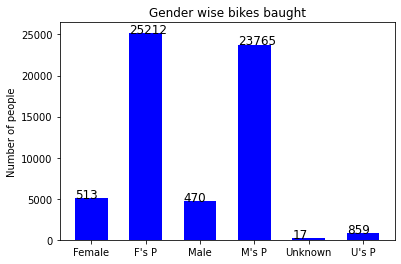

In [10]:
# fig, ax = plt.subplots()
plt.bar(x,graphl,color='blue',width=0.6)
plt.title("Gender wise bikes baught")
# ax.set_ylabel('Number of people')
plt.ylabel('Number of people')
plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))
graph_value=[gender[0],bikes[0],gender[1],bikes[1],gender[2],bikes[2]]
#Now the trick is here.
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and graphl[index] will gives you y pos
# x=index-0.3 , y=graphl[index]+0.1 will provide a little gap in x axis and y-axis,
# str(value) will gives string value to put in y location
# otherwise it's create vary large size figure
for index,value in enumerate(graph_value):
    plt.text(x=index-0.3 , y=graphl[index]+0.1 , s=str(value), size=12)
print(graph_value)

## Plotting percentage of bikes baught by gender

[50.59, 47.686, 1.724]


Text(0.5, 0, 'gender')

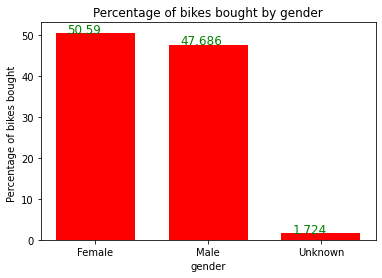

In [11]:
#plotting graph phursing bikes perasentage(Model Development)
avg=[0,0,0]
total=sum(bikes)
# print(total)
y=np.arange(3)
for i in  range(len(avg)):
    avg[i]=round((bikes[i]/total)*100,3)
print(avg)    
plt.bar(y,avg,color='red',width=0.7)
for i in range(len(avg)):
    plt.text(x=i-0.25,y=avg[i],s=avg[i],size=12,color='green')
plt.xticks(y,("Female","Male","Unknown"))
plt.ylabel("Percentage of bikes bought ")
plt.title("Percentage of bikes bought by gender")
plt.xlabel("gender")

## Plotting gender and age wise bikes baught

In [12]:
df['age']=0
df['y_of_birth']=pd.DatetimeIndex(df['DOB']).year
temp=df['y_of_birth'].dropna(axis=0)
df['y_of_birth']=temp
df['y_of_birth']=df['y_of_birth'].fillna(0).astype('int64')
df['age']=(2020-df['y_of_birth'])
zero=[]  #to take the 2020 age value
fq1=[]  # females between 32 years of age
mq1=[]  # males between 32 years of age
fq2=[]  # females between 32-49 years of age
mq2=[]  # males between 32-49 years of age
fq3=[]  # females between 49-66 years of age
mq3=[]  # males between 49-66 years of age
fq4=[]  # females over 66 years of age
mq4=[]  # males over 66 years of age
age1=[]
for i in range(len(df['age'])):
    if df['age'][i]!=2020:
        age1.append(df['age'][i])
mean_age=round(np.mean(age1),0)  #mean age
age_stdv=round(np.std(age1),0) # standard deviation of age
fq=int(mean_age-age_stdv)   #32
sq=int(mean_age)            #49
tq=int(sq+age_stdv)         #66
j=0
for i in df['gender']:
    temp=int(df['age'][j])
    if df['gender'][j]=='Female' and temp!=0:
        if (temp<fq):
            fq1.append(temp)
        elif fq<temp and temp<=sq:
            fq2.append(temp)
        elif sq<temp and temp<=tq:
            fq3.append(temp)
        elif tq<temp:
            fq4.append(temp)
    elif df['gender'][j]=='Male' and temp!=0:
        if (temp<fq):
            mq1.append(temp)
        elif fq<temp and temp<=sq:
            mq2.append(temp)
        elif sq<temp and temp<=tq:
            mq3.append(temp)
        elif tq<temp:
            mq4.append(temp)
    j+=1

p_d={"Female1":fq1,
     "Female2":fq2,
     "Female3":fq3,
     "Female4":fq4,
     "Male1":mq1,
     "Male2":mq2,
     "Male3":mq3,
     "Male4":mq4,
    }


In [13]:
print(len(p_d["Female1"]),len(p_d["Female2"]),len(p_d["Female3"]),len(p_d["Female4"]))
print(len(p_d["Male1"]),len(p_d["Male2"]),len(p_d["Male3"]),len(p_d["Male4"]))

96 164 154 93
104 137 141 84


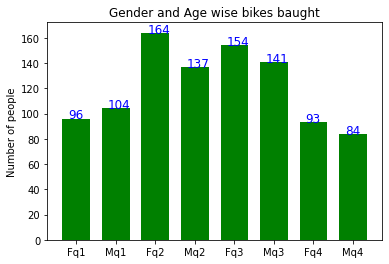

In [14]:
plot=[len(p_d["Female1"]),len(p_d["Male1"]),len(p_d["Female2"]),len(p_d['Male2']),len(p_d["Female3"]),len(p_d["Male3"]),len(p_d["Female4"]),len(p_d["Male4"])]
x1=np.arange(8)
plt.bar(x1,plot,color='green',width=0.7)
plt.xticks(x1,("Fq1","Mq1","Fq2","Mq2","Fq3","Mq3","Fq4","Mq4"))
plt.ylabel('Number of people')
plt.title('Gender and Age wise bikes baught')
for i in range(len(plot)):
    plt.text(x=i-0.2,y=plot[i],s=plot[i],size=12,color='blue')
plt.show()



## Analyzing customers on the basis of job industry category

In [15]:
df['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

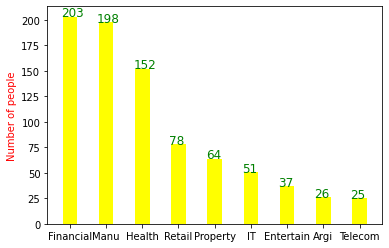

In [16]:
value=[203,198,152,78,64,51,37,26,25]
r=np.arange(9)
plt.bar(r,value,color='yellow',width=0.4)
plt.xticks(r,("Financial","Manu","Health","Retail","Property","IT","Entertain","Argi","Telecom"))
plt.ylabel('Number of people',color='red')
for i in range(len(value)):
    plt.text(x=i-0.25,y=value[i]+0.1,s=value[i],size=12,color='green')
plt.show()

## Wealth segment by age

In [17]:
#split into 3 parts: Mass,High,affluent
wsh  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q1=less than 32
wsm  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q2= more than 32 and less than 49
wsa  ={"q1":[],"q2":[],"q3":[],"q4":[]}   #q3= more than 49 and less than 66
val=0                                     #q4= more than 66
for each in df['wealth_segment']:
    temp = int(df['age'][val])
    if each[0]=='M' and temp!=0:
        if(temp<fq):
            wsm["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsm["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsm["q3"].append(temp)
        elif temp>tq:
            wsm["q4"].append(temp)
    elif each[0]=="H" and temp!=0:
        if(temp<fq):
            wsh["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsh["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsh["q3"].append(temp)
        elif temp>tq:
            wsh["q4"].append(temp)
    elif each[0]=="A" and temp!=0:
        if(temp<fq):
            wsa["q1"].append(temp)
        elif temp>fq and temp<=sq:
            wsa["q2"].append(temp)
        elif temp>sq and temp<=tq:
            wsa["q3"].append(temp)
        elif temp>tq:
            wsa["q4"].append(temp)
    val+=1
wshtp = [len(wsh["q1"]),len(wsh["q2"]),len(wsh["q3"]),len(wsh["q4"])]
wsmtp = [len(wsm["q1"]),len(wsm["q2"]),len(wsm["q3"]),len(wsm["q4"])]
wsatp = [len(wsa["q1"]),len(wsa["q2"]),len(wsa["q3"]),len(wsa["q4"]),]

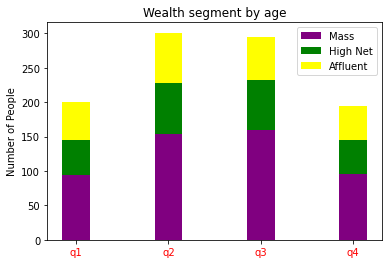

In [18]:
x2=np.arange(4)
bars = np.add(wsmtp,wshtp)
width = 0.3

plot1=plt.bar(x2,wsmtp,width,color='purple')
plot2=plt.bar(x2,wshtp,width,bottom=wsmtp,color='green')
plot3=plt.bar(x2,wsatp,width,bottom=bars,color='yellow')
plt.ylabel('Number of People')
plt.title('Wealth segment by age')
plt.xticks(x2,("q1","q2","q3","q4"),color='red')
plt.legend((plot1[0],plot2[0],plot3[0]),('Mass','High Net','Affluent'))
plt.show()

## Plotting state wise car owned or not owned

In [19]:
df['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [20]:
nsw_car=0
nsw_ncar=0
vic_car=0
vic_ncar=0
qld_car=0
qld_ncar=0
val=0
for ele in df['state']:
    if ele[0]=='N' and df['owns_car'][val]=="Yes":
        nsw_car+=1
    elif ele[0]=='N' and df['owns_car'][val]=="No":
        nsw_ncar+=1
    elif ele[0]=='V' and df['owns_car'][val]=="Yes":
        vic_car+=1
    elif ele[0]=='V' and df['owns_car'][val]=="No":
        vic_ncar+=1
    elif ele[0]=='Q' and df['owns_car'][val]=="Yes":
        qld_car+=1
    elif ele[0]=='Q' and df['owns_car'][val]=="No":
        qld_ncar+=1
    val+=1

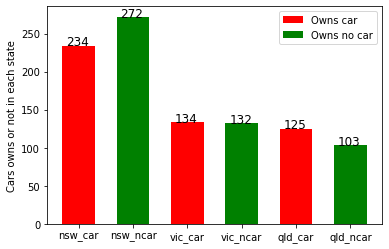

In [21]:
plot=[nsw_car,nsw_ncar,vic_car,vic_ncar,qld_car,qld_ncar]
x=np.arange(6)
colour=['red','green']
graph=plt.bar(x,plot,width=0.6,color=colour)
plt.ylabel('Cars owns or not in each state')
plt.xticks(x,("nsw_car","nsw_ncar","vic_car","vic_ncar","qld_car","qld_ncar"))
for i in range(len(plot)):
    plt.text(x=i-0.23,y=plot[i],s=plot[i],size=12)
plt.legend((graph[0],graph[1]),('Owns car','Owns no car'))
plt.show()